## TA Exercise: Higgs to gamma gamma

J.A Hernando, 12 Febrero 2024

In [5]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as optimize

# possible styles: ggplot (simplicity), bmh (scientify data). 
plt.style.context('seaborn-colorblind')

import htcore    as htcore
import htcatalog as htcata
import httoys    as httoys
import htplot    as htplot

**Exercise** The following data correspond to the Higgs to gamma gamma events. selected by the ATLAS experiment during the first run of LHC. The list is the number of events in bins of the invariant mass of the two gammas.

Consider that the background follows an exponential distribution. and the Higgs signal a gaussian. Estimate the mean value of the Higgs mass and the standard deviation. Compute also the p-value considering that there is no Higgs. ¿Can you clain a discovery?

In [230]:
data = [
105.2488132203966, 1482.3547109494102,
105.94694793076935, 1503.662077292889,
106.86598817995558, 1434.6487389346337,
108.38398657859341, 1311.7123868462745,
109.86876744317898, 1234.516977482293,
111.3697517556002, 1245.7754702806433,
112.87897564379972, 1179.0326457113374,
114.3882702788114, 1014.8814679839438,
115.88820952245558, 1036.0332785385408,
117.41276837828192, 969.2273521057148,
118.89043313168807, 873.4079137564681,
120.4574933926158, 818.081657004803,
121.92304751778124, 836.9094993342806,
123.39214903526977, 822.1553610051167,
124.95333817131085, 822.4090865137866,
126.42222423057693, 750.576575836975,
127.90427602310393, 672.3445439970408,
129.47157601294538, 614.7488535289381,
130.9440004560878, 568.5376856762446,
132.40659813559245, 556.2351700746051,
133.92034607358522, 591.772599132705,
135.44382534524019, 535.1867361891088,
136.9596810587593, 550.770556931624,
138.43649676339962, 403.87073671190865,
139.95034161930397, 438.490676207407,
141.41347902388932, 421.07876317492423,
142.9923105700799, 372.55375964177597,
144.45095529103241, 397.67258500011167,
145.97321262165863, 352.654430461796,
147.49500474630946, 312.0402258239674,
148.95322733591394, 341.1552279438565,
150.41645519721672, 322.88699131961243,
151.98976888364348, 326.59772688391195,
153.45185095985872, 319.1762557553127,
154.86002513994268, 290.0204763215304]
ndata = len(data)
print("data ", ndata)
mass   = np.array([data[int(2*i)]   for i in range(int(ndata/2))])
counts = np.array([data[int(2*i+1)] for i in range(int(ndata/2))])
df = pd.DataFrame({'mass' : mass, 'counts': counts})
df

data  70


,mass,counts
0,105.248813,1482.354711
1,105.946948,1503.662077
2,106.865988,1434.648739
3,108.383987,1311.712387
4,109.868767,1234.516977
5,111.369752,1245.775470
6,112.878976,1179.032646
7,114.388270,1014.881468
8,115.888210,1036.033279
9,117.412768,969.227352


ValueError: x and y must be the same size

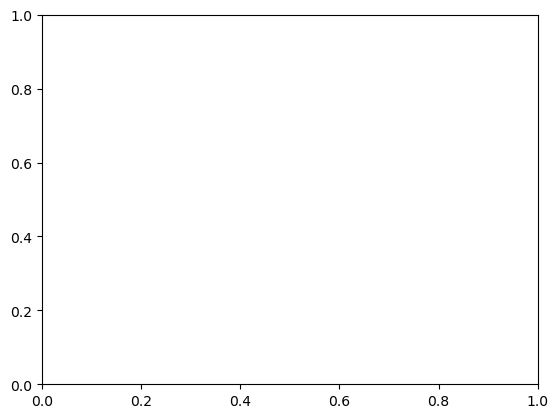

In [472]:
plt.scatter(mass, counts)

In [41]:
def experiment(size = 1, nbkg = 30000, nsig = 400, m0 = 100, m1 = 150, tau = 30, msig = 125, ssig = 1.5):
    """ generate data from a exponential + a gaussian signal
    """
    exps = []
    for i in range(size):
        nb = stats.poisson.rvs(nbkg, size = 1)
        xs = stats.expon.rvs(loc = m0, scale = tau, size = nb)
        ns = stats.poisson.rvs(nsig, size = 1)
        ys = msig + ssig * stats.norm.rvs(size = ns)
        zs = np.array(list(xs) + list(ys))
        np.random.shuffle(zs)
        sel = np.logical_and(zs >= m0, zs < m1)
        exps.append(zs[sel])
    if (size == 1): return exps[0]
    return exps


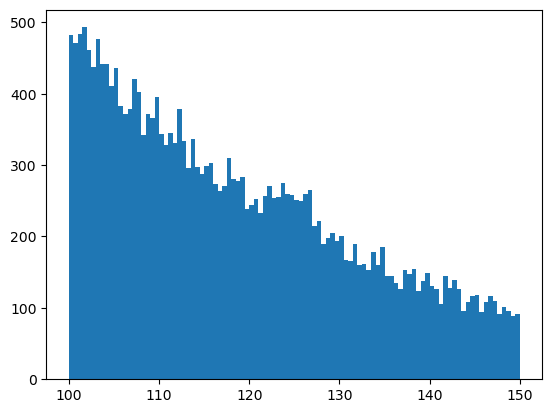

In [42]:
zs = experiment()
plt.hist(zs, range = (100, 150), bins = 100);

In [29]:
print(stats.expon.fit(xs))
print(np.sum(xs)/len(xs))

(0.006821440375151818, 30.344527513786314)
30.351348954161466


In [45]:
def binned_exponll(counts, bins):
    def exponll(mu):
        xx  = stats.expon.pdf(bins[0:-1], loc = loc, scale = mu) - stats.expon.pdf(bins[1:], loc = loc, scale = mu)
        val = np.sum(counts * np.log(xx))
        return val
    return exponll

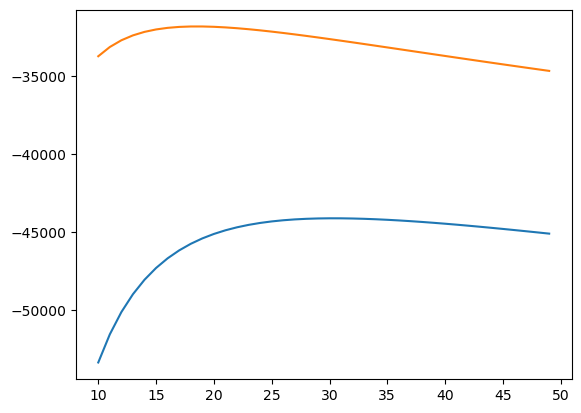

In [48]:
llu = lambda tau : np.sum(stats.expon.logpdf(xs, loc = loc, scale = tau)) 
llb = lambda tau : np.sum(counts * stats.expon.logpdf(centers, loc = loc, scale = tau))
taus = np.arange(10, 50, 1)
plt.plot(taus, [llu(tau) for tau in taus])
plt.plot(taus, [llb(tau) for tau in taus])

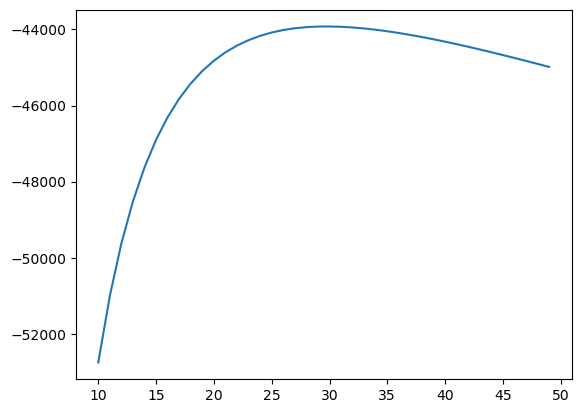

In [4]:
ll = lambda mu : np.sum(stats.expon.logpdf(xs, scale = mu))
taus = np.arange(10, 50, 1)
plt.plot(taus, [ll(tau) for tau in taus])

5e-05


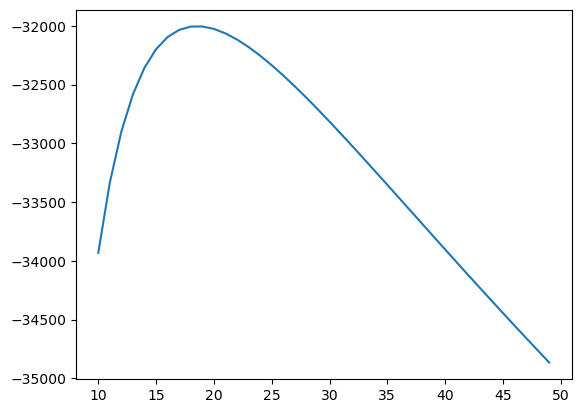

In [11]:
ccounts, bins = np.histogram(xs, range = (0, 50), bins = 1000000)
centers = bins[:-1] + 0.5*(bins[1:]-bins[:-1])
dbin = bins[1]-bins[0]
#plt.scatter(centers, counts)
xllbin = lambda mu : np.sum(ccounts * stats.expon.logpdf(centers, loc = 0, scale = mu))
plt.plot(taus, [xllbin(tau) for tau in taus])
print(dbin)

In [431]:
def experiment():
    mass0  = 0
    nbkg   = 30000
    nsig   = 0
    tau    = 30
    mhiggs = 25
    sigma  = 2.
    rv_exp = stats.expon(tau)
    xmass  = mass0 + rv_exp.rvs(nbkg)
    ymass  = mhiggs + sigma * stats.norm .rvs(size =  nsig)
    cc     = plt.hist(list(xmass) + list(ymass), range= (0, 50), bins = 35, alpha = 0.5)
    return cc

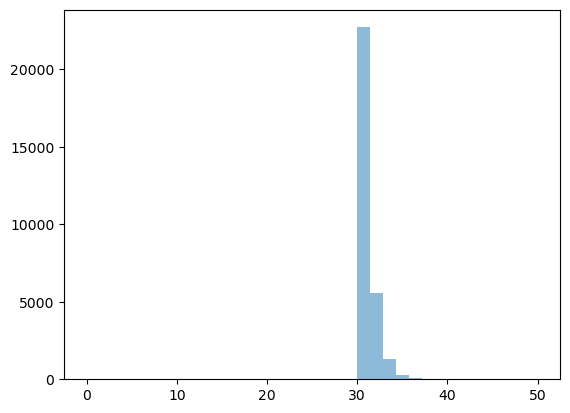

In [432]:
cc = experiment()

In [420]:
contents = cc[0]
bins     = np.array(cc[1])
bins     = bins[0:-1] 
print(len(contents), len(bins))

35 35


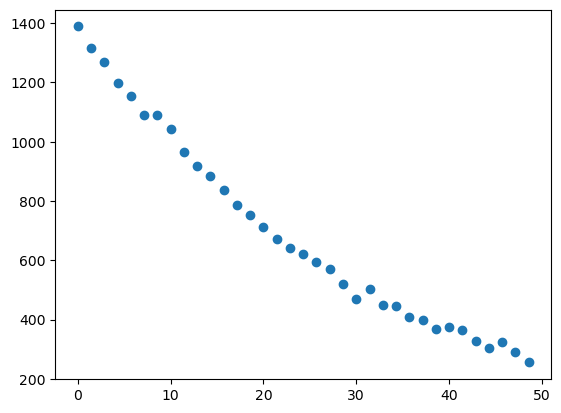

In [421]:
plt.scatter(bins, contents)

In [425]:
def get_loglike(bins, counts):
    def loglike(mu):
        vals = np.sum(counts * stats.expon.logpdf(bins, mu))
        return vals
    return loglike

def tau_hat(bins, counts):
    that = np.sum(counts * bins)/(np.sum(counts)-1)
    return that

In [423]:
that = tau_hat(bins, contents)
print(that)

17.564729388258797


-inf


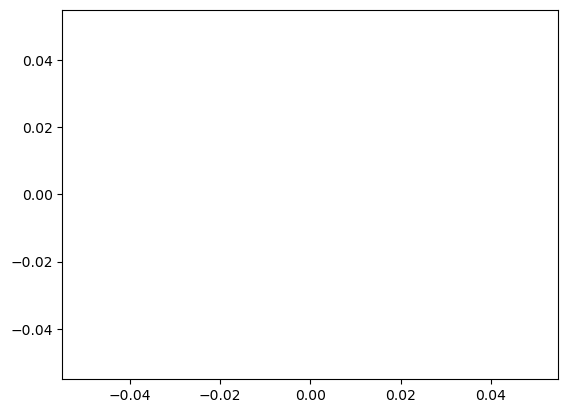

In [424]:
ll = get_loglike(bins, contents)
_2ll = lambda mu : -2*ll(mu)
tau = 30
print(ll(30))
taus = np.arange(10, 50, 1)
plt.plot(taus, [_2ll(tau) for tau in taus])

In [ ]:
def get_pdf(mu):
    nbkg, nsig, tau, mean, sigma = mu
    fbkg = 1.*nbkg/float(nbkg + nsig)
    fsig = 1. - fbkg
    def _pdf(xx):
        x0 = min(xx)
        val  =  fbkg * stats.expon.pdf(xx, loc = x0, scale = tau)
        val +=  fsig * stats.norm .pdf(xx, mean, sigma)
        return val
    return _pdf

    
def get_extloglike(x, counts):
    def _ell(mu):
        nbkg, nsig = mu[0], mu[1]
        _xpdf = get_pdf(mu)
        xpdf = _xpdf(x)
        lpx = np.sum(counts * np.log(xpdf))
        ncounts = int(sum(counts))
        lpn = stats.norm.logpdf(nbkg+nsig, ncounts, np.sqrt(ncounts))
        if (np.isinf(lpn)): lpn = 1e-320
        if (np.isinf(lpx)): lpn = 1e-320
        return lpx + lpn
    return _ell


0.5883110196478687


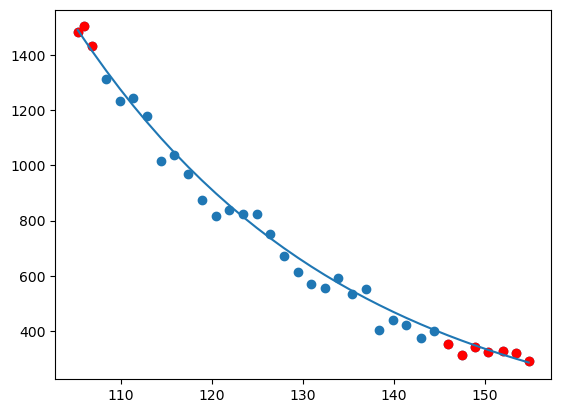

In [311]:
tau = 30.
hmass = 125
sigma = 2.
sel = np.logical_or(mass < 108, mass > 145)
pdf = lambda x : stats.expon.rvs(x, loc = min(mass), scale =  tau)
ncounts = sum(counts[sel])
print(sum(pdf(mass)))
factor = ncounts/sum(pdf(mass[sel]))
plt.plot(mass,  factor * pdf(mass))
plt.scatter(mass, counts)
plt.scatter(mass[sel], counts[sel], c = "red")

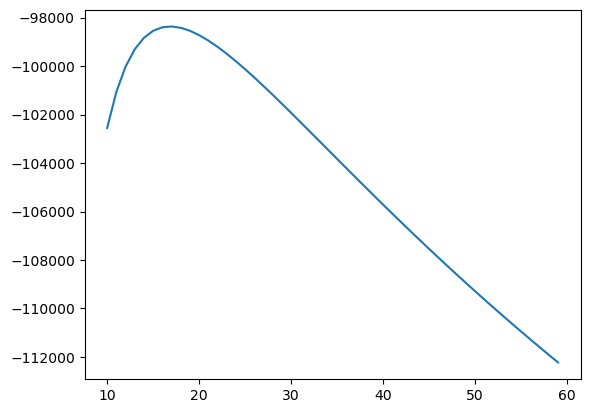

In [309]:
ell = lambda mu : np.sum(counts * stats.expon.logpdf(mass, loc = min(mass), scale = mu))
#ell(tau)
taus = np.arange(10, 60, 1)
taus
plt.plot(taus, [ell(tau) for tau in taus])

In [232]:
def get_pdf(mu):
    nbkg, nsig, tau, mean, sigma = mu
    fbkg = 1.*nbkg/float(nbkg + nsig)
    fsig = 1. - fbkg
    def _pdf(xx):
        x0 = min(xx)
        val  =  fbkg * stats.expon.pdf(xx, loc = x0, scale = tau)
        val +=  fsig * stats.norm .pdf(xx, mean, sigma)
        return val
    return _pdf

def get_pdf(mu):
    nbkg, nsig, tau = mu
    fbkg = 1.*nbkg/float(nbkg + nsig)
    fsig = 1. - fbkg
    def _pdf(xx):
        x0 = min(xx)
        val  =  fbkg * stats.expon.pdf(xx, loc = x0, scale = tau)
        return val
    return _pdf

    
def get_extloglike(x, counts):
    def _ell(mu):
        nbkg, nsig = mu[0], mu[1]
        _xpdf = get_pdf(mu)
        xpdf = _xpdf(x)
        lpx = np.sum(counts * np.log(xpdf))
        ncounts = int(sum(counts))
        lpn = stats.norm.logpdf(nbkg+nsig, ncounts, np.sqrt(ncounts))
        if (np.isinf(lpn)): lpn = 1e-320
        if (np.isinf(lpx)): lpn = 1e-320
        return lpx + lpn
    return _ell


In [233]:
nbkg    = 25200   # number of bkg events
nhiggs  =  500.   # number of signal events
tau     =  30.    # exponential 
hmass   = 125     # higgs mass
sigma   = 3       # mass resolution
mu      = (nbkg, nhiggs, tau, hmass, sigma)

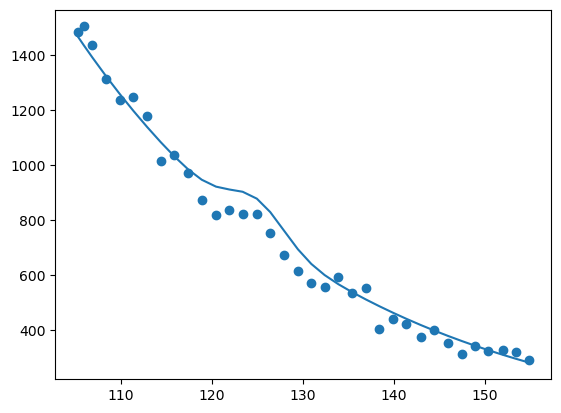

In [234]:
pdf = get_pdf(mu)
factor = 2.5
ncounts = sum(counts)
dmass   = mass[1] - mass[0]
plt.plot(mass, factor * ncounts * dmass * pdf(mass))
plt.scatter(mass, counts)

In [235]:
ell = get_extloglike(mass, counts)
_2ell = lambda mu : -2*ell(mu)

In [238]:
_2ell(mu)
result = optimize.minimize(_2ell, mu, method='Nelder-Mead')

In [239]:
result

 final_simplex: (array([[1.57359456e+04, 9.98705380e+03, 8.83774509e+00, 1.34702348e+02,
        1.11164980e+01],
       [1.57359457e+04, 9.98705377e+03, 8.83774519e+00, 1.34702348e+02,
        1.11164980e+01],
       [1.57359456e+04, 9.98705375e+03, 8.83774517e+00, 1.34702348e+02,
        1.11164980e+01],
       [1.57359456e+04, 9.98705377e+03, 8.83774516e+00, 1.34702348e+02,
        1.11164980e+01],
       [1.57359455e+04, 9.98705384e+03, 8.83774512e+00, 1.34702348e+02,
        1.11164980e+01],
       [1.57359456e+04, 9.98705374e+03, 8.83774517e+00, 1.34702348e+02,
        1.11164980e+01]]), array([193526.98577192, 193526.98577192, 193526.98577192, 193526.98577192,
       193526.98577192, 193526.98577192]))
           fun: 193526.98577192405
       message: 'Optimization terminated successfully.'
          nfev: 865
           nit: 524
        status: 0
       success: True
             x: array([1.57359456e+04, 9.98705380e+03, 8.83774509e+00, 1.34702348e+02,
       1.11164980e+01])

In [244]:
muhat = result.x
muhat
print(muhat[0]+muhat[1])

25722.999433006426


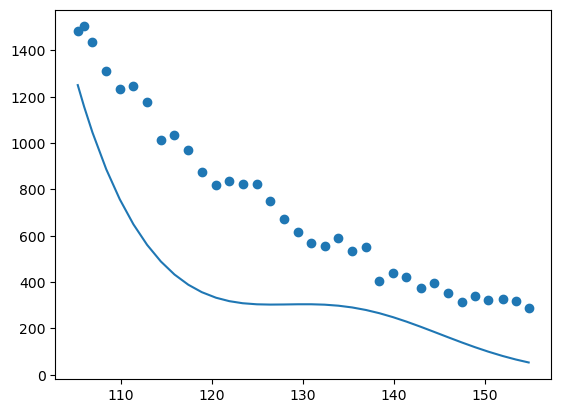

In [246]:
hatpdf = get_pdf(muhat)
plt.plot(mass, ncounts * dmass * hatpdf(mass))
plt.scatter(mass, counts)

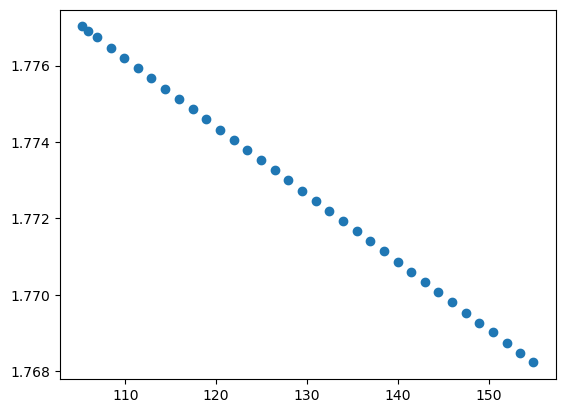

In [136]:
mass = np.array(mass)
dmass = mass[1]-mass[0]
tau  = 10000.
plt.scatter(mass, ncounts * dmass * np.exp(-1.*mass/tau)/tau)

In [98]:
ell = get_extloglike(mass, counts)
ell(mu)

-435865.4823652418

In [99]:
_2ell = lambda mu : -2 * ell(mu)
result = optimize.minimize(_2ell, mu, method='Nelder-Mead')
result

/var/folders/56/_pmdccc97ljb_l3v3s6gkrxm0000gn/T/ipykernel_1938/3153047749.py:16: RuntimeWarning: invalid value encountered in log
  lpx = np.sum(counts * np.log(xpdf))
/var/folders/56/_pmdccc97ljb_l3v3s6gkrxm0000gn/T/ipykernel_1938/3153047749.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  fbkg = 1.*nbkg/float(nbkg + nsig)
/var/folders/56/_pmdccc97ljb_l3v3s6gkrxm0000gn/T/ipykernel_1938/3153047749.py:7: RuntimeWarning: invalid value encountered in add
  val +=  fsig * stats.norm .pdf(xx, mean, sigma)


 final_simplex: (array([[-9.31642852e+02,  9.31642852e+02,  7.97180795e-02,
         1.22911297e+02,  6.05122344e+00],
       [-9.31642852e+02,  9.31642852e+02,  7.97180795e-02,
         1.22911297e+02,  6.05122344e+00],
       [-9.31642852e+02,  9.31642852e+02,  7.97180795e-02,
         1.22911297e+02,  6.05122344e+00],
       [-9.31642852e+02,  9.31642852e+02,  7.97180795e-02,
         1.22911297e+02,  6.05122344e+00],
       [-9.31642852e+02,  9.31642852e+02,  7.97180795e-02,
         1.22911297e+02,  6.05122344e+00],
       [-9.31642852e+02,  9.31642852e+02,  7.97180795e-02,
         1.22911297e+02,  6.05122344e+00]]), array([-1581773.6509271 , -1581773.65092578, -1581773.65092565,
       -1581773.65092564, -1581773.65092562, -1581773.65092463]))
           fun: -1581773.6509271017
       message: 'Optimization terminated successfully.'
          nfev: 746
           nit: 350
        status: 0
       success: True
             x: array([-9.31642852e+02,  9.31642852e+02,  7.97180795

In [47]:
ll

(-426982.8936147059, -inf)